In [16]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install scipy
# %pip install numpy

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [19]:
train = pd.read_csv('./ae-data/training_set.csv')
test = pd.read_csv('./ae-data/test_set.csv')

## Investigate the dataset provided

In [20]:
## Summary Statistics

# Summary statistics for the training set
print(train.describe(include='all'))

# Summary statistics for the test set
print(test.describe(include='all'))


        IMD_Decile_From_LSOA Age_Band           Sex        AE_Arrive_Date  \
count           99734.000000   100000  99542.000000                100000   
unique                   NaN        6           NaN                  1461   
top                      NaN    65-84           NaN  2015-09-19T00:00:00Z   
freq                     NaN    21532           NaN                   107   
mean                4.885315      NaN      1.510599                   NaN   
std                 2.858454      NaN      0.499890                   NaN   
min                 1.000000      NaN      1.000000                   NaN   
25%                 2.000000      NaN      1.000000                   NaN   
50%                 5.000000      NaN      2.000000                   NaN   
75%                 7.000000      NaN      2.000000                   NaN   
max                10.000000      NaN      2.000000                   NaN   

       AE_Arrive_HourOfDay   AE_Time_Mins AE_HRG  AE_Num_Diagnoses  \
count

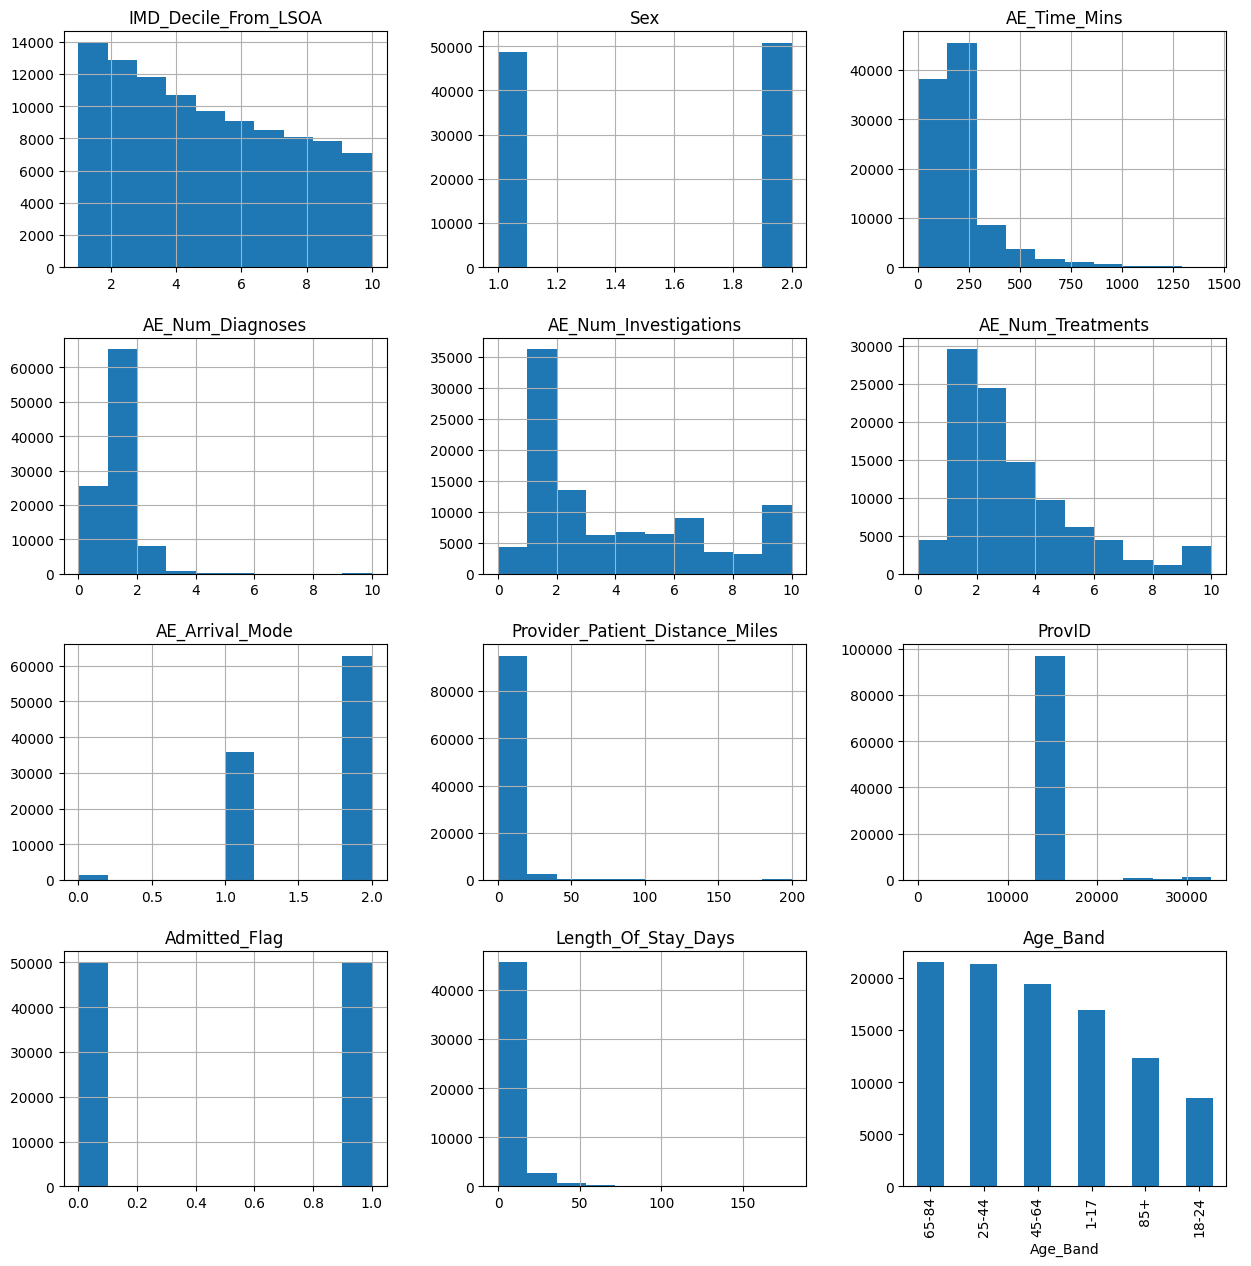

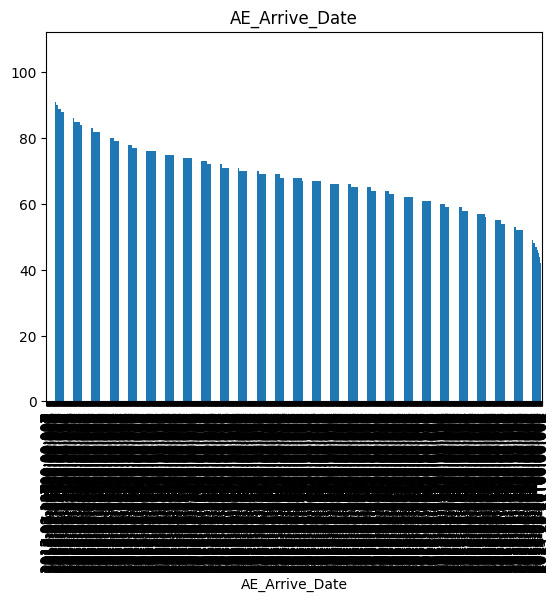

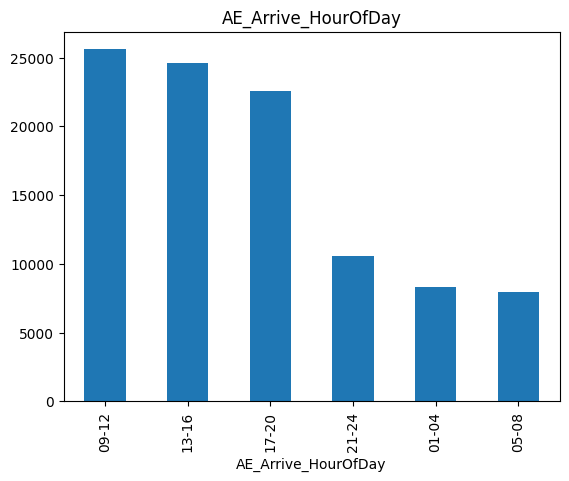

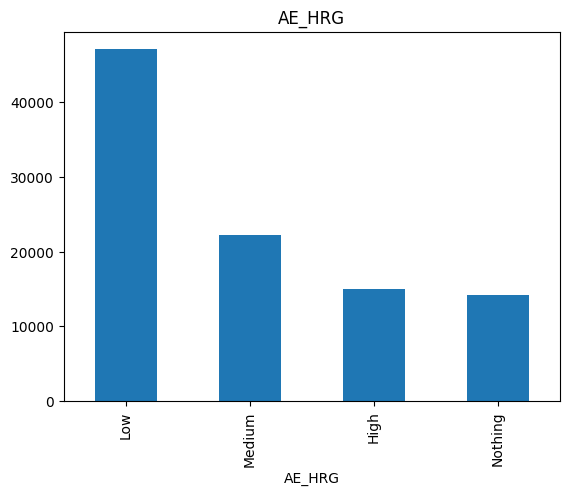

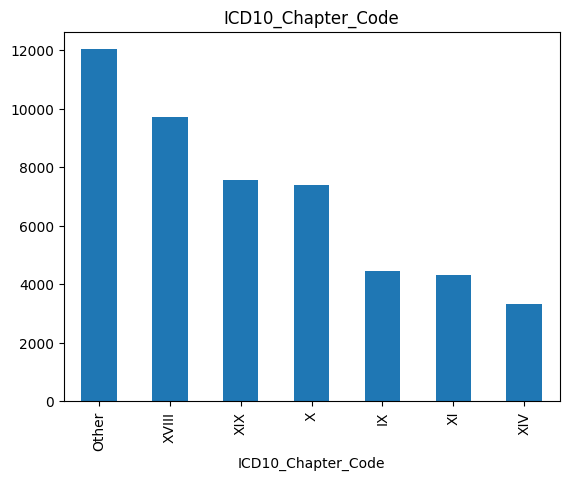

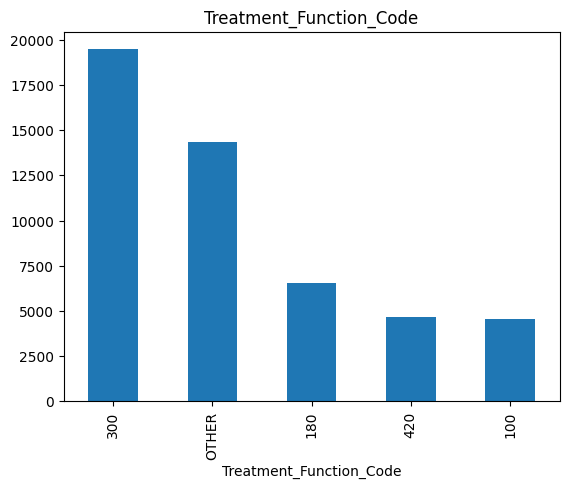

In [21]:
## Distribution of variables

# Histograms for numeric variables in the training set
train.hist(figsize=(15,15))

# Bar plots for categorical variables in the training set
for column in train.select_dtypes(include=['object']).columns:
    train[column].value_counts().plot(kind='bar', title=column)
    plt.show()


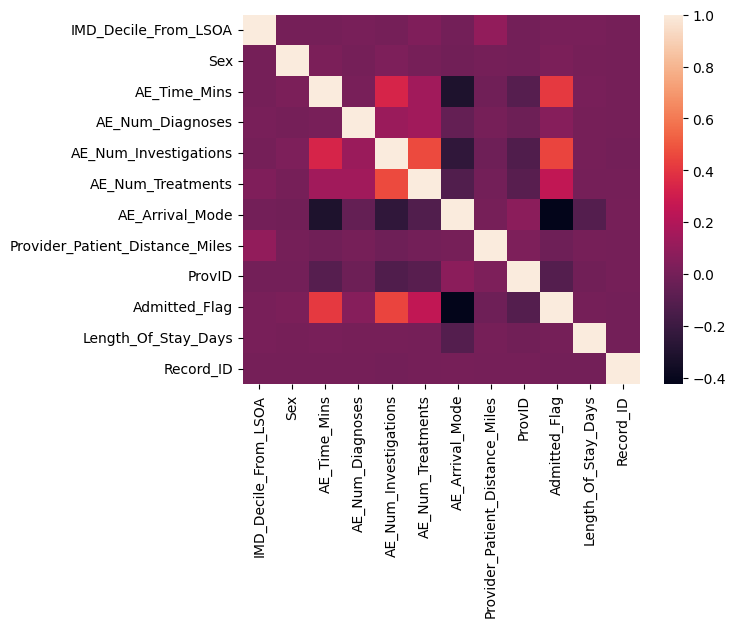

In [22]:
## Correlation between variables

# Select only numeric columns
# We have to do this because correlation calculates the correlation between numeric variables. So we have to exclude the categorical variables.
# Might be useful to convert the categorical data types to numberical so we can MAYBE fo colelctional analysis
numeric_columns = train.select_dtypes(include=[np.number])

# Correlation matrix for the numeric columns in the training set
corr_matrix = numeric_columns.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False)
plt.show()


In [23]:
## Cross tabulation and Contingency tables

# Cross-tabulation of two categorical variables example
pd.crosstab(train['Sex'], train['Age_Band'])


Age_Band,1-17,18-24,25-44,45-64,65-84,85+
Sex,,,,,,
1.0,8902,3840,10234,9992,10784,4964
2.0,7987,4660,11064,9428,10748,6939


In [24]:
## Grouped summary statistics

# Grouped summary statistics for the training set
# Average AE_Time_Mins for each Age_Band
train.groupby('Age_Band')['AE_Time_Mins'].mean()


Age_Band
1-17     165.891409
18-24    174.097647
25-44    183.317527
45-64    205.449537
65-84    247.083875
85+      252.944984
Name: AE_Time_Mins, dtype: float64

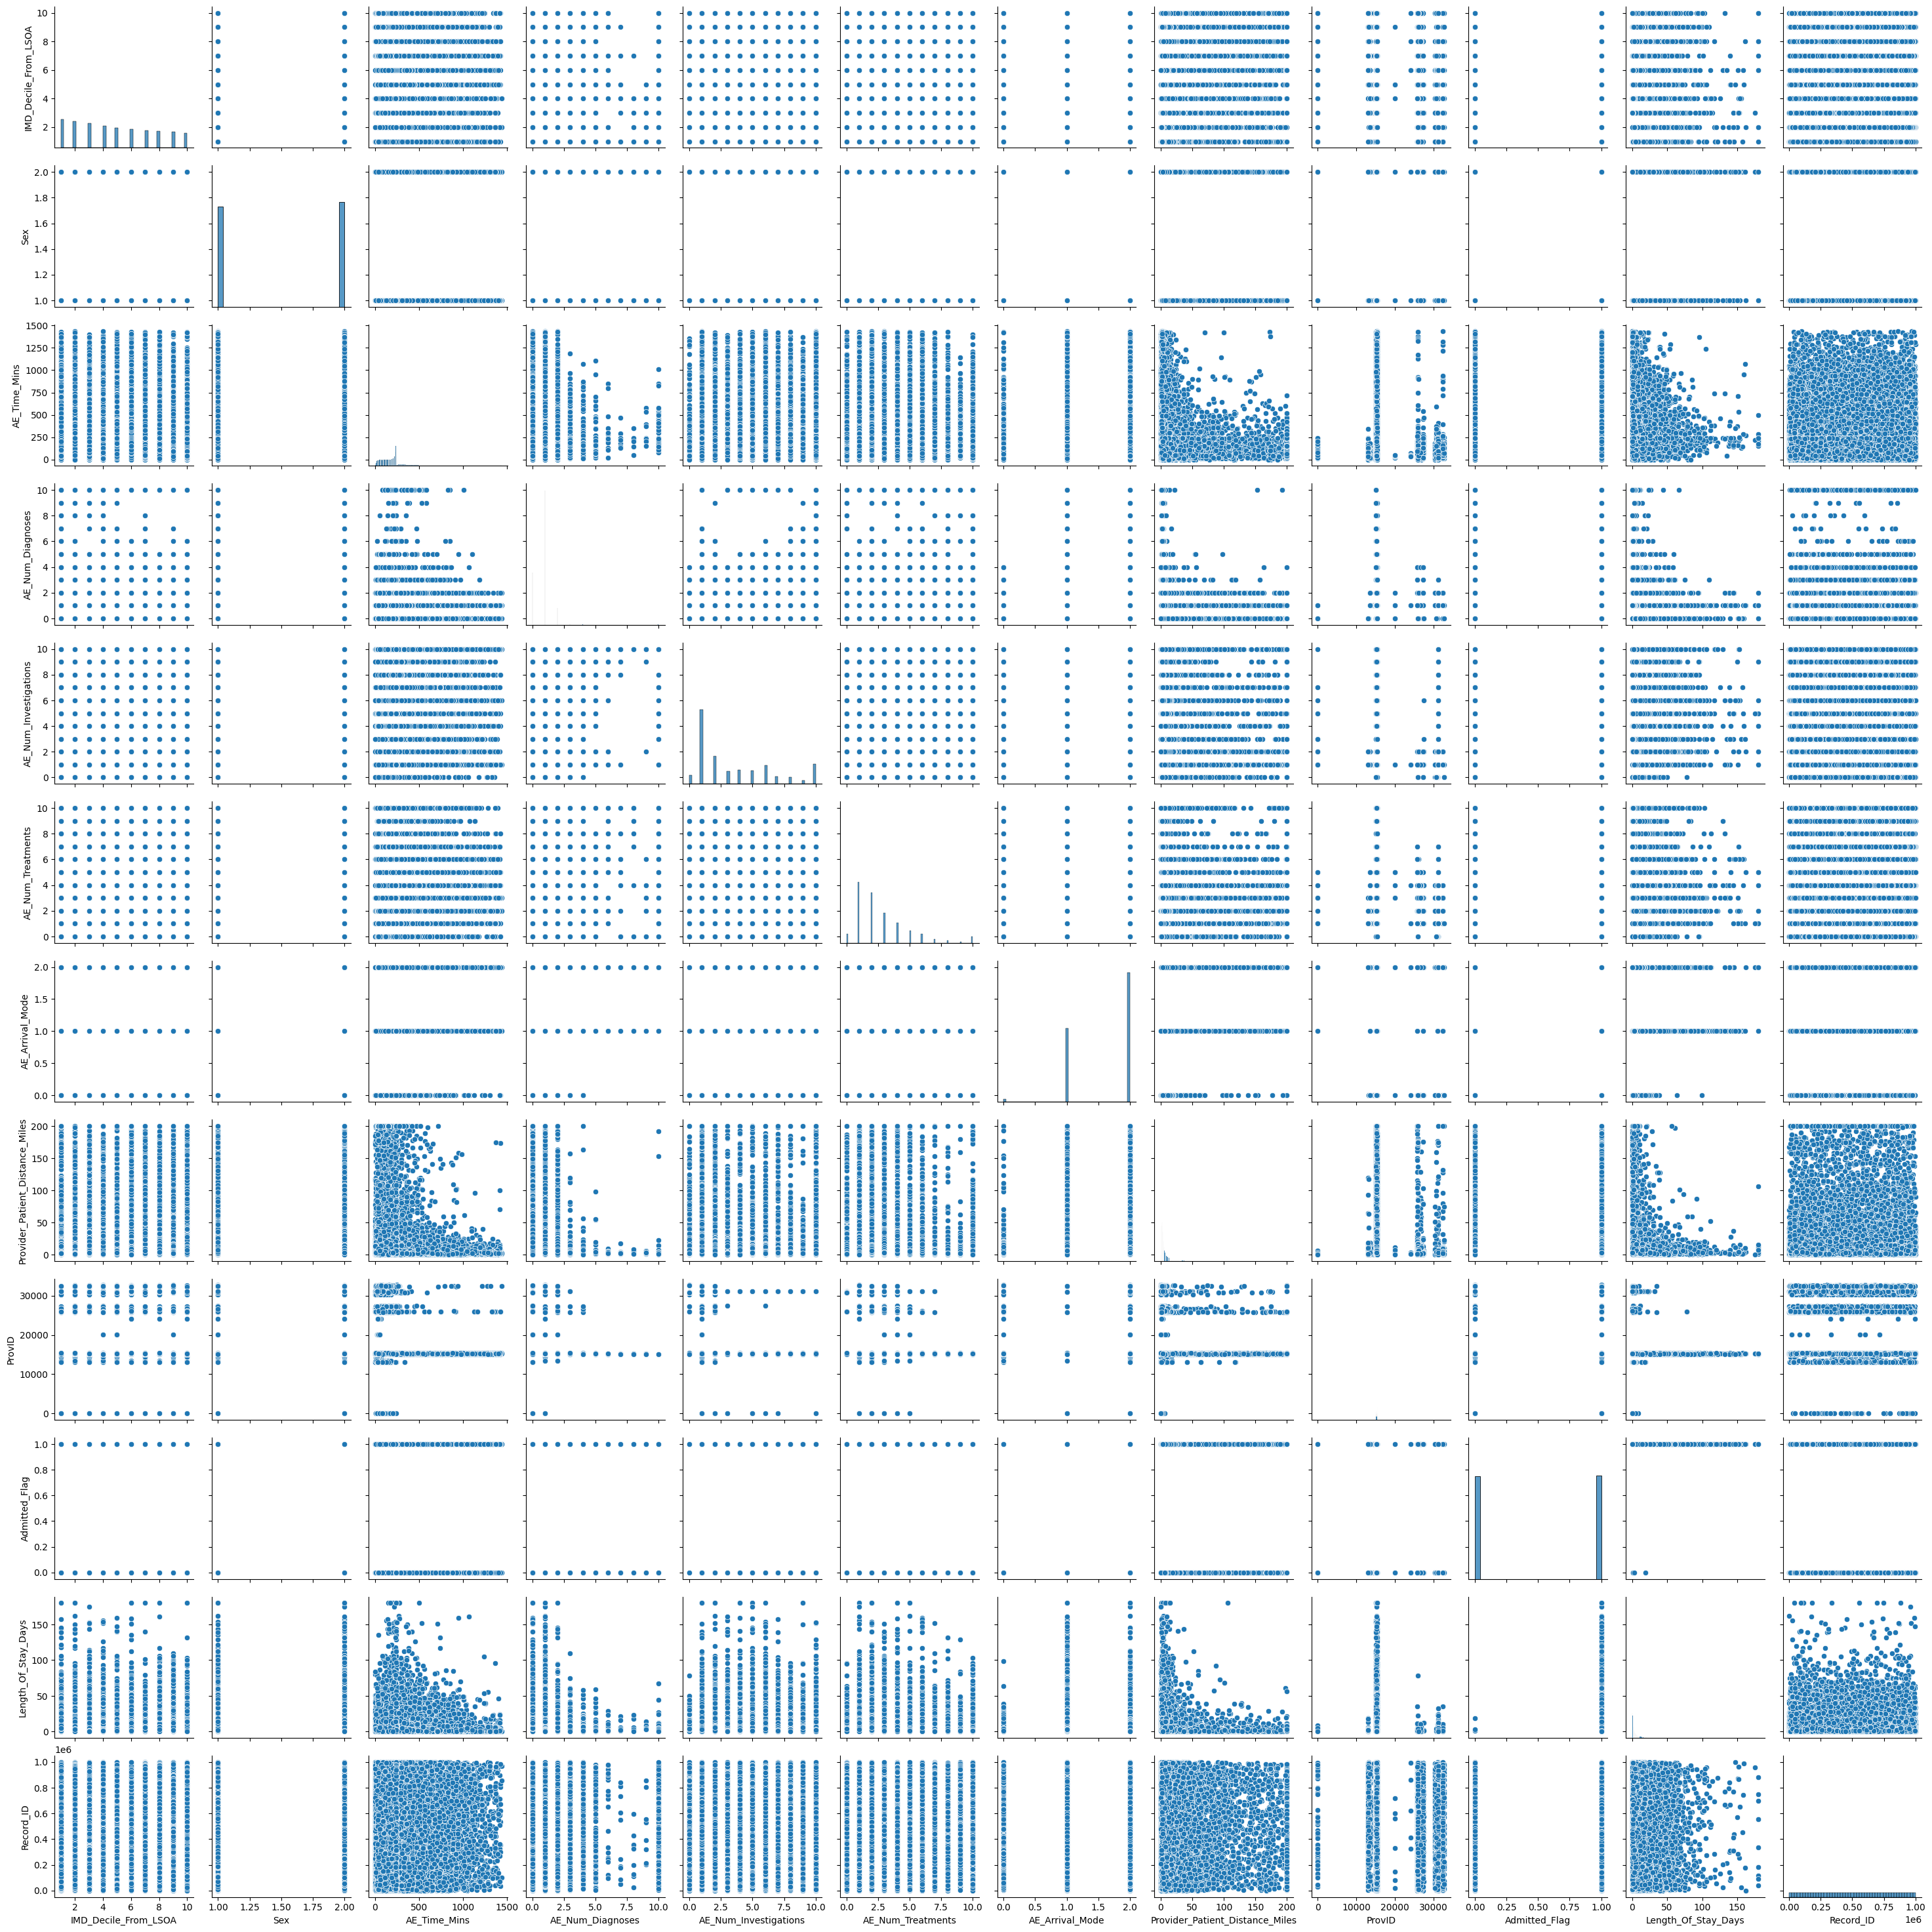

In [25]:
## Pairwise relationships

# Pairplot of the training set
sns.pairplot(train)
plt.show()


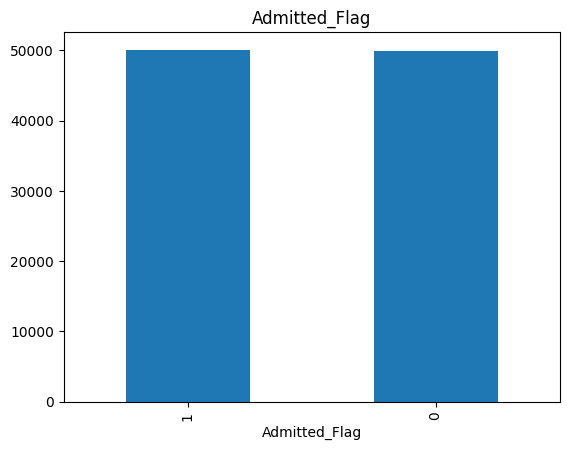

In [26]:
## Visualise target variable distributions 

# Distribution of the target variable
# This is already quite weird. This is probably a sign that the data is synthetic, since we have an exact equal number admitted and not admitted.
train['Admitted_Flag'].value_counts().plot(kind='bar', title='Admitted_Flag')
plt.show()

In [31]:
## Missing values analysis 

# Count of missing values in the training set
print(train.isnull().sum())

# Count of missing values in the test set
print(test.isnull().sum())


IMD_Decile_From_LSOA                 266
Age_Band                               0
Sex                                  458
AE_Arrive_Date                         0
AE_Arrive_HourOfDay                  458
AE_Time_Mins                           0
AE_HRG                              1534
AE_Num_Diagnoses                       0
AE_Num_Investigations                  0
AE_Num_Treatments                      0
AE_Arrival_Mode                        0
Provider_Patient_Distance_Miles      266
ProvID                                 0
Admitted_Flag                          0
ICD10_Chapter_Code                 51218
Treatment_Function_Code            50381
Length_Of_Stay_Days                50377
Record_ID                              0
dtype: int64
IMD_Decile_From_LSOA                 124
Age_Band                               0
Sex                                  230
AE_Arrive_Date                         0
AE_Arrive_HourOfDay                  230
AE_Time_Mins                           0
AE_

In [28]:
## Removing columns with excessive number of null values

# Define the threshold for missing values
missing_threshold = 0.5

# Identify columns in the training set that have more than 50% missing values
columns_to_drop_train = train.columns[train.isnull().mean() > missing_threshold]

# Drop these columns from the training set
train_drop = train.drop(columns_to_drop_train, axis=1)

# Drop the same columns from the test set
test_drop = train.drop(columns_to_drop_train, axis=1)


In [29]:
# Reanalyse with the new training set

## Summary Statistics

# Summary statistics for the training set
print(train_drop.describe(include='all'))

# Summary statistics for the test set
print(test_drop.describe(include='all'))

## Missing values analysis 

# Count of missing values in the training set
print(train_drop.isnull().sum())

# Count of missing values in the test set
print(test_drop.isnull().sum())


        IMD_Decile_From_LSOA Age_Band           Sex        AE_Arrive_Date  \
count           99734.000000   100000  99542.000000                100000   
unique                   NaN        6           NaN                  1461   
top                      NaN    65-84           NaN  2015-09-19T00:00:00Z   
freq                     NaN    21532           NaN                   107   
mean                4.885315      NaN      1.510599                   NaN   
std                 2.858454      NaN      0.499890                   NaN   
min                 1.000000      NaN      1.000000                   NaN   
25%                 2.000000      NaN      1.000000                   NaN   
50%                 5.000000      NaN      2.000000                   NaN   
75%                 7.000000      NaN      2.000000                   NaN   
max                10.000000      NaN      2.000000                   NaN   

       AE_Arrive_HourOfDay   AE_Time_Mins AE_HRG  AE_Num_Diagnoses  \
count

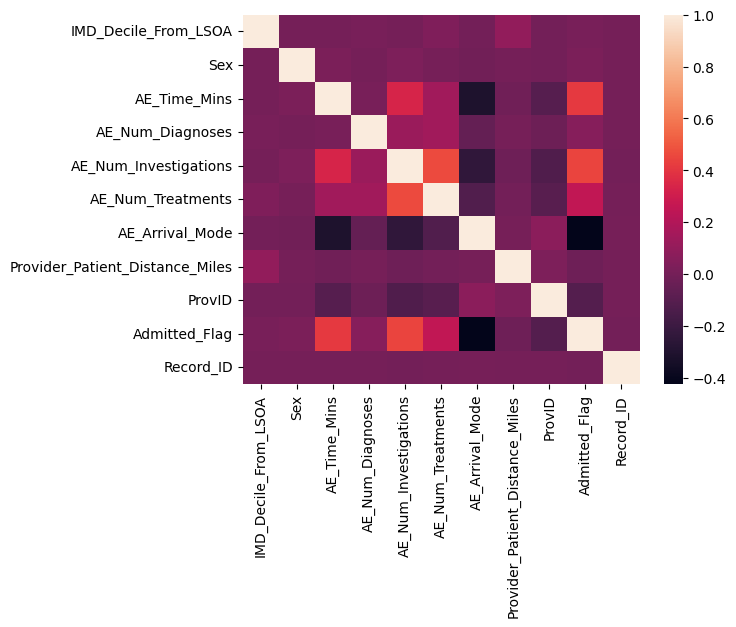

In [30]:
## Correlation between variables

numeric_columns = train_drop.select_dtypes(include=[np.number])

# Correlation matrix for the numeric columns in the training set
corr_matrix = numeric_columns.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False)
plt.show()
